In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from kneed import KneeLocator

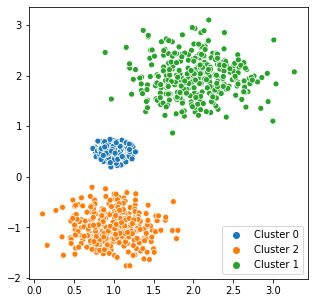

In [2]:
# generate synthetic dataset with 3 clusters
centers = [[1, 0.5], [2, 2], [1, -1]]
stds = [0.1, 0.4, 0.3]
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["Cluster {}".format(x) for x in labels_true])
#plt.savefig("blobs.png", dpi=300)

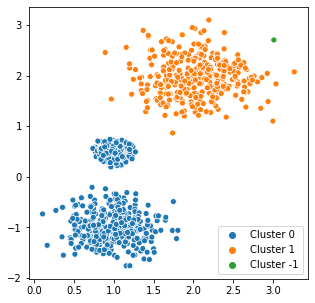

In [3]:
# example of naive empirical DBScan
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["Cluster {}".format(x) for x in labels])
#plt.savefig("dbscan_dumb.png", dpi=300)

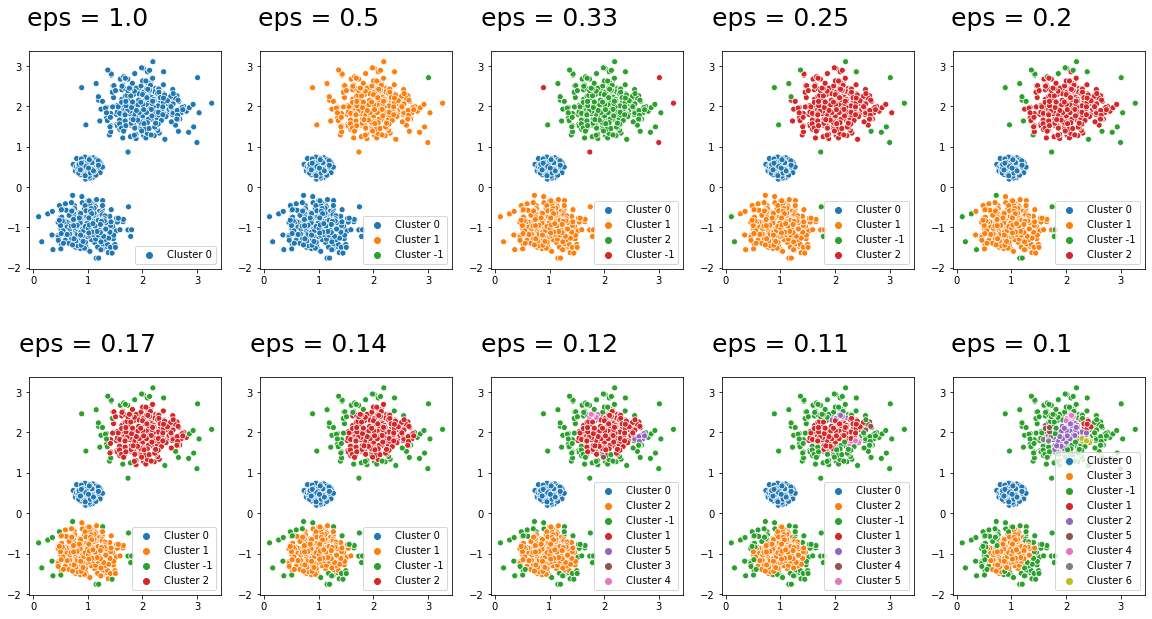

In [4]:
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1

for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    labels = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 2)), fontsize=25, ha="center")
    sns.scatterplot(X[:,0], X[:,1], hue=["Cluster {}".format(x) for x in labels])
    
    i += 1
    
#plt.savefig("multi_eps.png", dpi=300)

Text(0, 0.5, 'Distance')

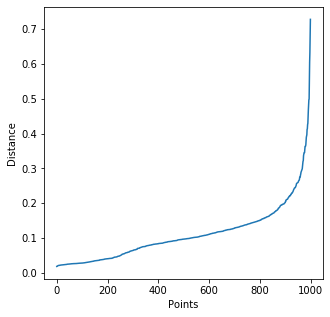

In [5]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

#plt.savefig("Distance_curve.png", dpi=300)

Text(0, 0.5, 'Distance')

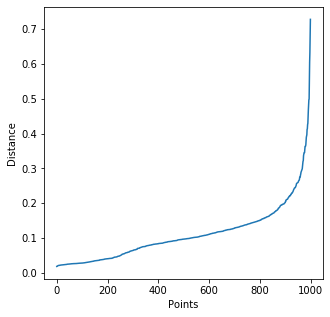

In [6]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)

distances = np.sort(distances[:,10], axis=0)
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

#plt.savefig("Distance_curve.png", dpi=300)

0.17794276915465104


<Figure size 360x360 with 0 Axes>

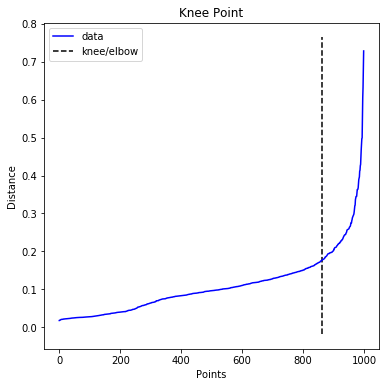

In [7]:
fig = plt.figure(figsize=(5, 5));
knee.plot_knee();
plt.xlabel("Points");
plt.ylabel("Distance");

print(distances[knee.knee])

#plt.savefig("knee.png", dpi=300)

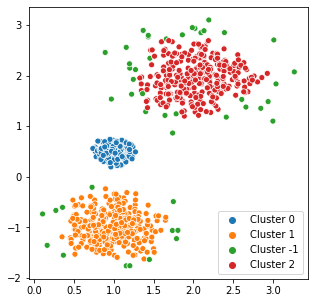

In [8]:
db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(X[:,0], X[:,1], hue=["Cluster {}".format(x) for x in labels])
#plt.savefig("dbscan_with_knee.png", dpi=300)

## Problem

Are you able to find a similar technique to optimize the parameter **min_samples**?
Are you able to jointly optimize **eps** and **min_samples**?

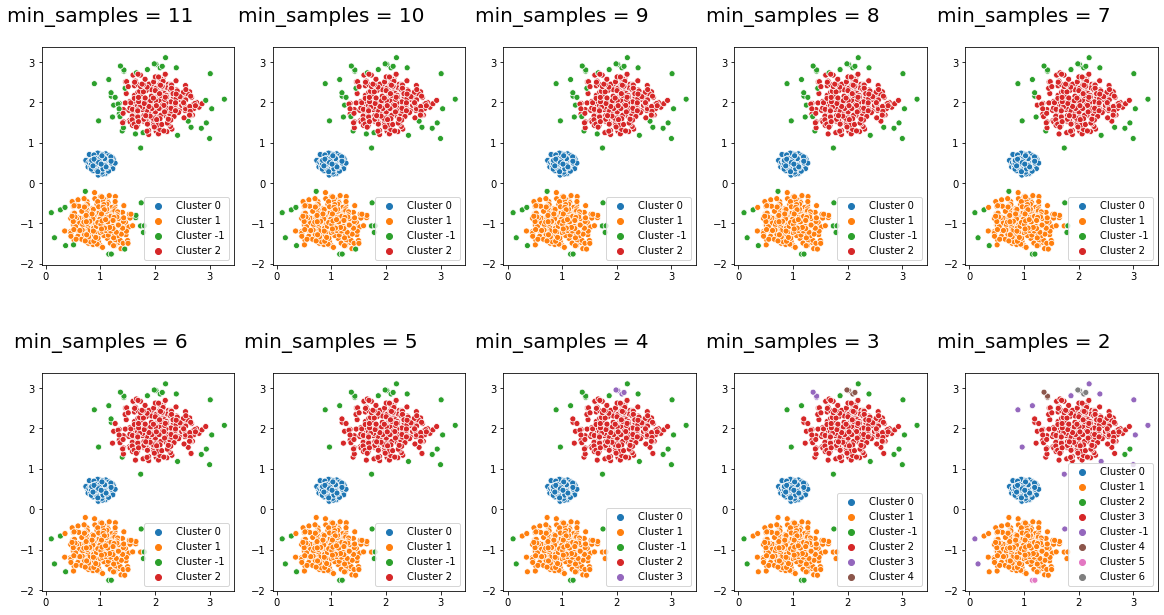

In [9]:
# GridSearch for minimum samples, constant eps
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
clusts = []
for x in range(11, 1, -1):
    eps = 0.178
    db = DBSCAN(eps=eps, min_samples=x).fit(X)
    labels = db.labels_
    
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "min_samples = {}".format(x), fontsize=20, ha="center")
    clusts.append(sns.scatterplot(X[:,0], X[:,1], hue=["Cluster {}".format(x) for x in labels]))
    
    i += 1

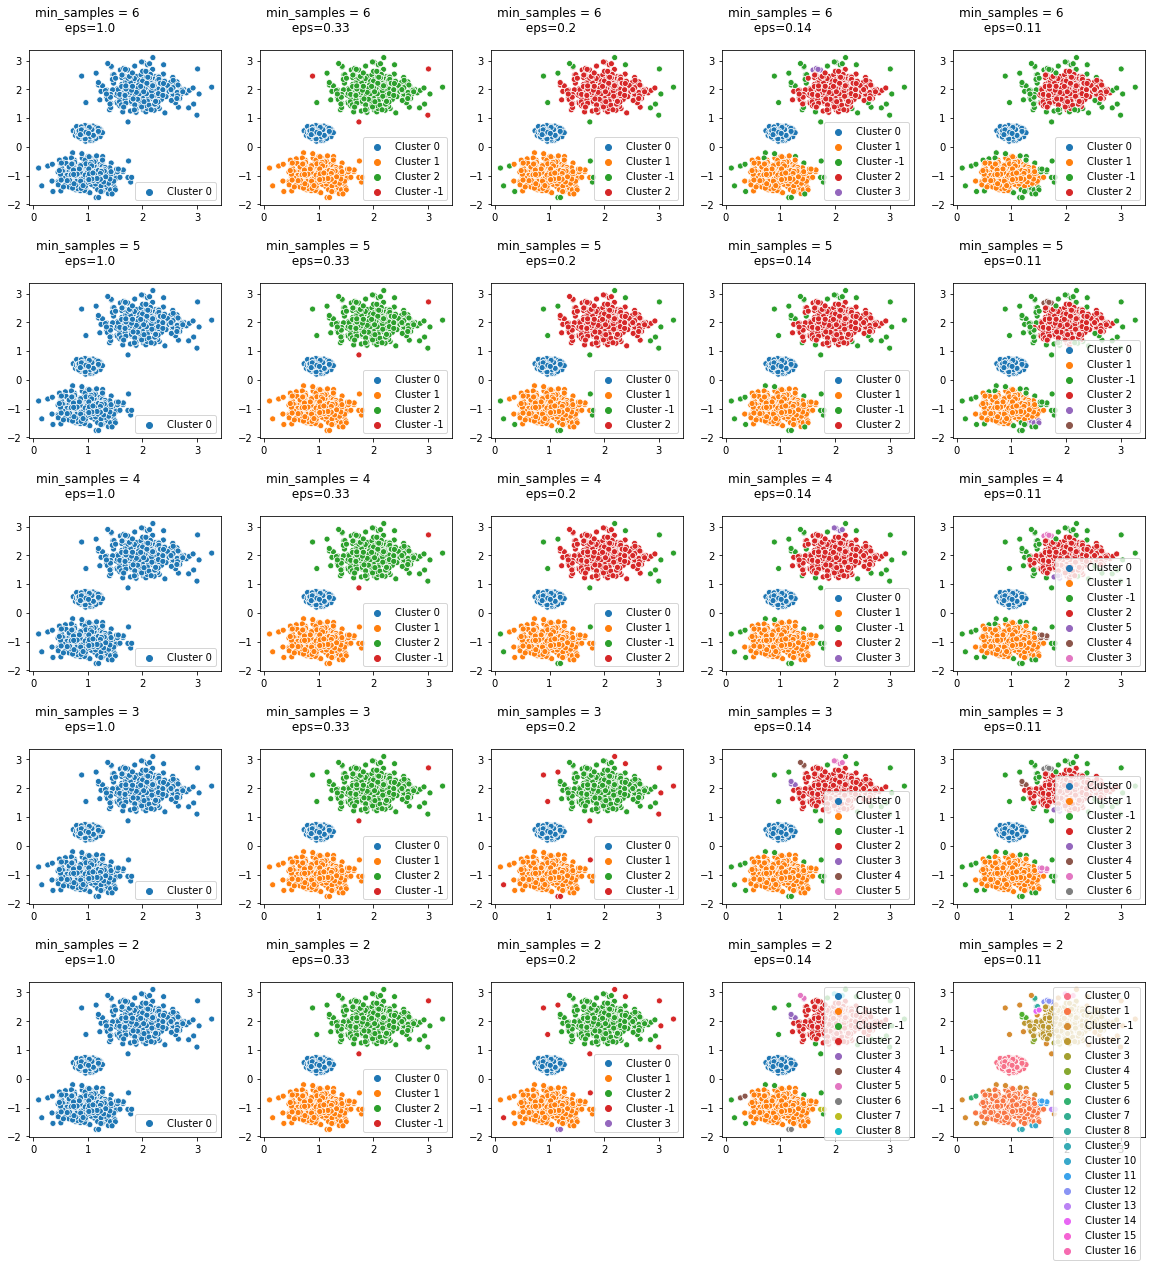

In [10]:
# GridSearch for both min_samples and eps
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1

for x in range(6, 1, -1):
    for y in range(10, 1, -2):
        eps = 1/(11-y)
        db = DBSCAN(eps=eps, min_samples=x).fit(X)
        labels = db.labels_

        ax = fig.add_subplot(5, 5, i)
        ax.text(1, 4, f"min_samples = {x}\n eps={round(eps, 2)}", fontsize=12, ha="center")
        sns.scatterplot(X[:,0], X[:,1], hue=["Cluster {}".format(x) for x in labels])

        i += 1

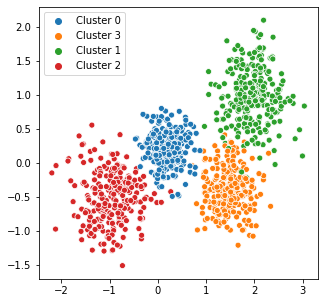

In [11]:
# New dataset and KneeLocator helper function

# generate synthetic dataset with 4 clusters
centers = [[0.2, 0.2], [2, 1], [-1, -0.5], [1.5, -0.4]]
stds = [0.25, 0.4, 0.4, 0.32]
C4, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(C4[:,0], C4[:,1], hue=["Cluster {}".format(x) for x in labels_true])
#plt.savefig("blobs.png", dpi=300)

def kneecap(cluster_data, n_vizinhos):
    nearest_neighbors = NearestNeighbors(n_neighbors=n_vizinhos)
    neighbors = nearest_neighbors.fit(cluster_data)
    distances, indices = neighbors.kneighbors(cluster_data)

    distances = np.sort(distances[:,n_vizinhos-1], axis=0)
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

    #plt.savefig("Distance_curve.png", dpi=300)
    return distances[knee.knee]   

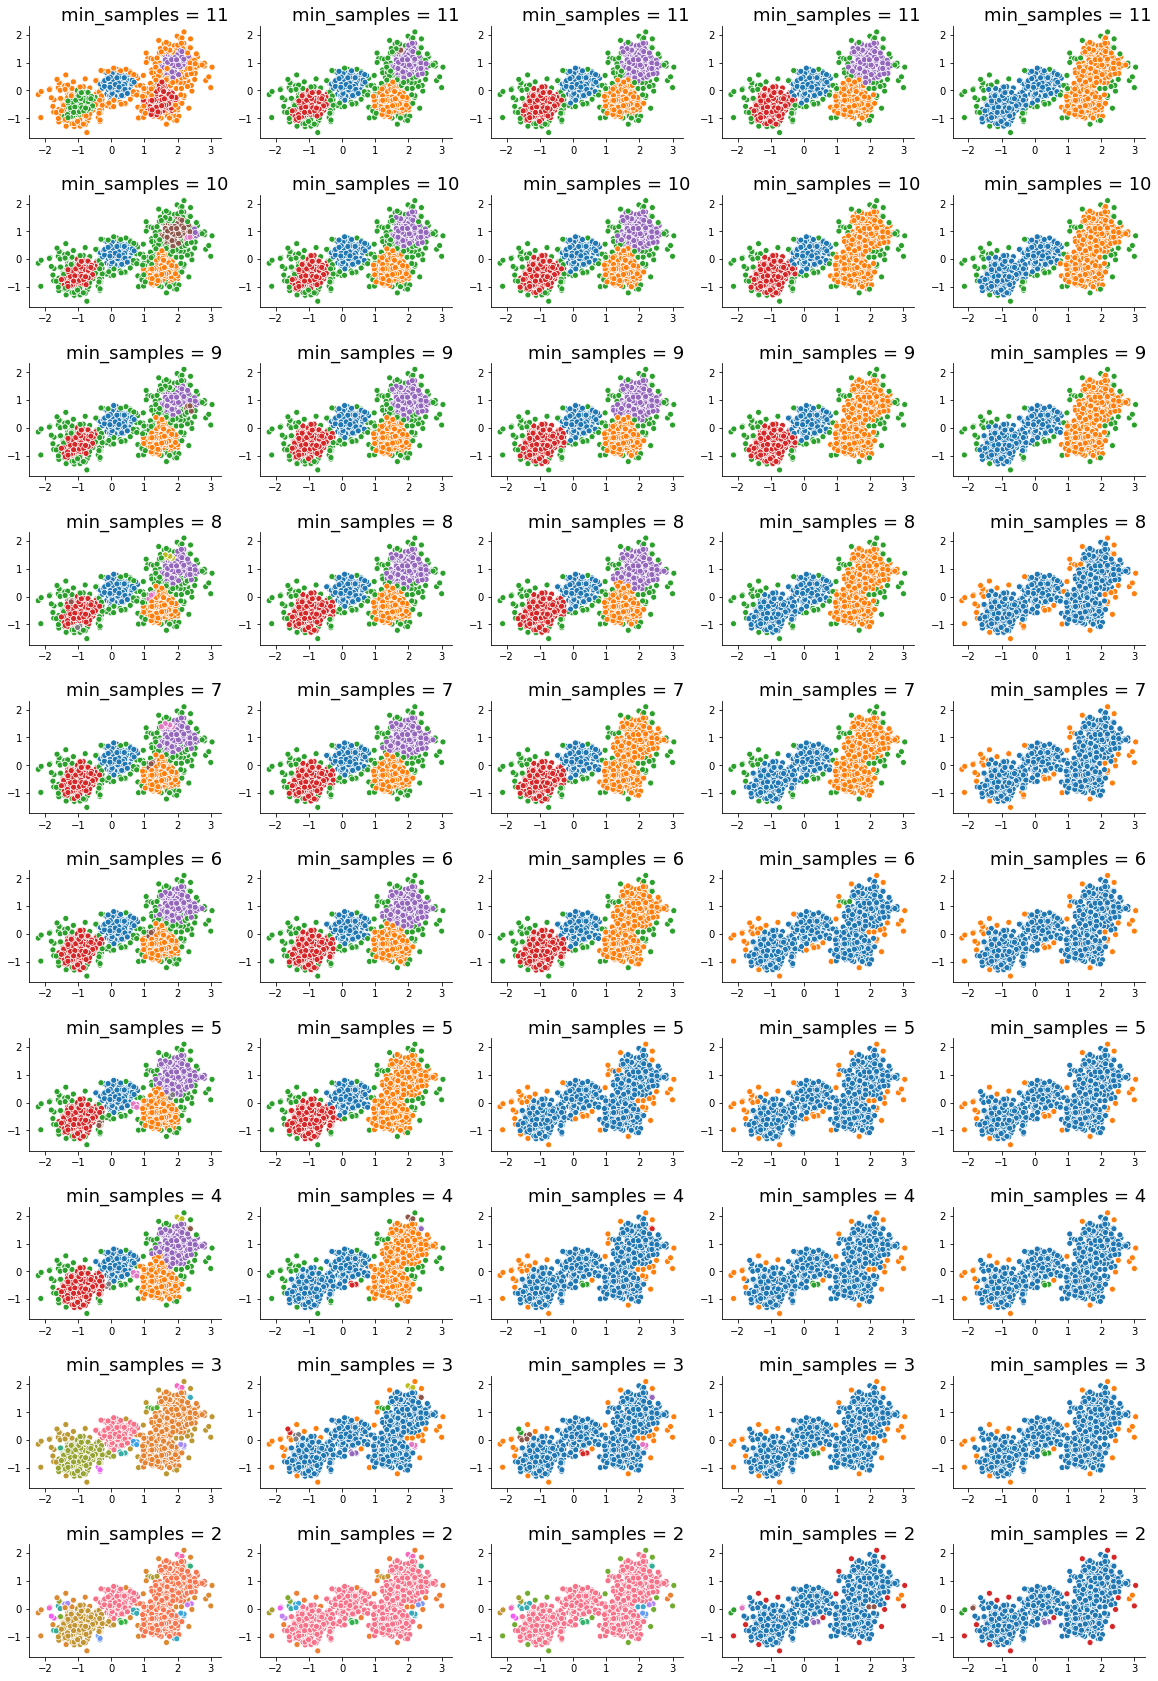

In [13]:
# GridSearch for minimum samples, optimized eps with KneeLocator
fig = plt.figure(figsize=(20, 30))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
clusts = []

#eps_distance = kneecap(C4, 6)

for x in range(11, 1, -1):
    for k in range(4, 9, 1):
        eps = kneecap(C4, k)
        
        db = DBSCAN(eps=eps, min_samples=x).fit(C4)
        labels = db.labels_

        ax = fig.add_subplot(10, 5, i)
        sns.despine()
        ax.text(1, 2.5, "min_samples = {}".format(x), fontsize=18, ha="center")
        clusts.append(sns.scatterplot(C4[:,0], C4[:,1], hue=["Cluster {}".format(x) for x in labels], legend=None))

        i += 1

### Conclusions

* Increasing K-Neighbors in KneeLocator could lead to cluster misclassification due to increasing eps distance. Decreasing K-Neighbors and eps distance could lead to higher outlier count or over-clustering (higher heterogeneity - too many cluster classes);

* With lower values of minimum samples (3~2 minimum number of neighbors), in a similar fashion to K-Neighbors in KneeLocator, could lead to cluster misclassification (homogeneity - lower separability) where too many datapoints fall within the same cluster. Opposingly, a higher number of neighbors could lead to higher outlier count and cluster classes.

* Higher variance of the data could imply higher outlier count, as datapoints get further from their cluster centroid. Observing the red blob, there could be some outlier misclassification in the [-2, 0] region, and similarly in the [3, 2] purple blob region - even though there's no close boundary sharing with other blobs/clusters. 

* A better representation of the resulting clusters would be suitable, perhaps animating through each graph with matplotlib.FuncAnimation;

* Measuring outlier count and mean core-border-point distances (average of distance between each border point and, either its cluster centroid or its closest core-points) for each cluster could help further fine-tuning.